In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import pandas as pd

In [4]:
df=pd.read_table("test4_cap.csv")

In [5]:
df["frame.number"].describe()

count    13519.000000
mean      6760.000000
std       3902.743479
min          1.000000
25%       3380.500000
50%       6760.000000
75%      10139.500000
max      13519.000000
Name: frame.number, dtype: float64

In [6]:
df.head()


,frame.number,frame.time,frame.time_relative,ip.src,ip.dst,udp.port,tcp.port,frame.len
0,1,"Apr 25, 2006 05:58:54.624365000 CDT",0.000000,192.168.62.121,227.111.1.3,"32917,12345",NaN,1358
1,2,"Apr 25, 2006 05:58:54.624484000 CDT",0.000119,192.168.62.121,227.111.1.1,"32915,12345",NaN,1358
2,3,"Apr 25, 2006 05:58:54.624692000 CDT",0.000327,192.168.62.121,227.111.1.2,"32916,12345",NaN,1358
3,4,"Apr 25, 2006 05:58:54.624911000 CDT",0.000546,192.168.62.121,227.111.1.4,"32920,12345",NaN,1358
4,5,"Apr 25, 2006 05:58:54.625132000 CDT",0.000767,192.168.62.121,227.111.1.6,"32923,12345",NaN,1358


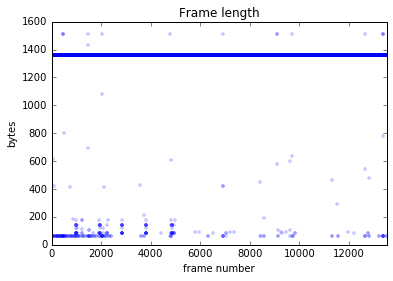

In [7]:
df["frame.len"].plot(style=".", alpha=0.2)
title("Frame length")
ylabel("bytes")
xlabel("frame number")

In [9]:
df["frame.time"].head()

0    Apr 25, 2006 05:58:54.624365000 CDT
1    Apr 25, 2006 05:58:54.624484000 CDT
2    Apr 25, 2006 05:58:54.624692000 CDT
3    Apr 25, 2006 05:58:54.624911000 CDT
4    Apr 25, 2006 05:58:54.625132000 CDT
Name: frame.time, dtype: object

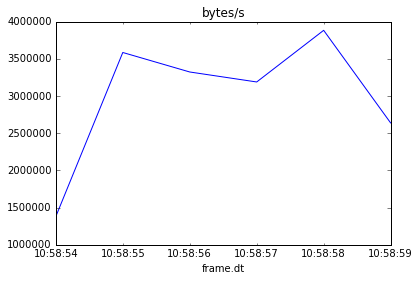

In [22]:
from datetime import datetime
# df["frame.dt"] = df["frame.time"].apply(lambda x: datetime.strptime(x,"%b %d, %Y %H:%M:%S.%f000 CDT" ) )
# This is a pandas built in for time
df["frame.dt"] = df["frame.time"].apply(lambda x: pd.to_datetime(x))
df["frame.dt"].head()
dft = df.set_index("frame.dt")
dft.head()
bytes_per_second = dft["frame.len"].resample("S", how="sum")
bytes_per_second.head()

bytes_per_second.plot(title="bytes/s")

In [9]:
start_time = dft.index[0]
start_time

dft.index = dft.index - start_time
dft.index

TimedeltaIndex([       '00:00:00', '00:00:00.000119', '00:00:00.000327',
                '00:00:00.000546', '00:00:00.000767', '00:00:00.000982',
                '00:00:00.001193', '00:00:00.001413', '00:00:00.001633',
                '00:00:00.001852',
                ...
                '00:00:05.031403', '00:00:05.031522', '00:00:05.031699',
                '00:00:05.031884', '00:00:05.032092', '00:00:05.032313',
                '00:00:05.032523', '00:00:05.032531', '00:00:05.032536',
                '00:00:05.032801'],
               dtype='timedelta64[ns]', name='frame.dt', length=13519, freq=None)

In [28]:
# resample "S" "L" this is now bits per millisecond (the way wireshark  seems to do it)
# If we take a smaller time slice but want we want bits/s * 1000 for example if millisecond "L" is used will give bits/sec instead of bits/millisec
# if we want bits * by 8
bytes_per_second_per_ms =  1000* dft["frame.len"].resample("L", how="sum")



In [29]:
bytes_per_second_per_ms.index= range(len(bytes_per_second_per_ms))
bytes_per_second_per_ms.head()

0    65184
1    43456
2    54320
3    55280
4    54320
Name: frame.len, dtype: float64

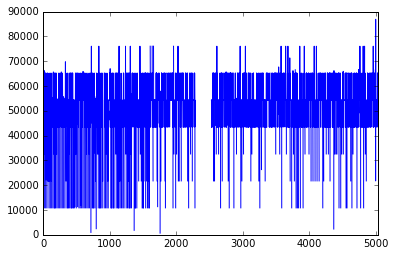

In [30]:
bytes_per_second_per_ms.plot()

In [50]:
bits_per_second_per_ms =  1000* dft["frame.len"].resample("L", how="sum") * 8.0
spikes = bits_per_second_per_ms[bits_per_second_per_ms>70000000]

print(len(spikes))
print(len(bits_per_second_per_ms))


bits_per_second_per_ms.max()

28
5033


86912000.0

In [51]:
spike_data  = []
from datetime import timedelta
for ms in spikes.index:
    ms2 = ms + timedelta(milliseconds=1)
    
    spike_data_for_ms = dft[(dft.index>=ms) & (dft.index<ms2)]
    spike_data.append(spike_data_for_ms)
    
all_spike_data = pd.concat(spike_data)
all_spike_data.head()

print (len(all_spike_data))
print (len(dft))

0 days 00:00:00.726000 , 0 days 00:00:00.727000
0 days 00:00:00.838000 , 0 days 00:00:00.839000
0 days 00:00:01.142000 , 0 days 00:00:01.143000
0 days 00:00:01.239000 , 0 days 00:00:01.240000
0 days 00:00:01.311000 , 0 days 00:00:01.312000
0 days 00:00:01.456000 , 0 days 00:00:01.457000
0 days 00:00:01.610000 , 0 days 00:00:01.611000
0 days 00:00:01.640000 , 0 days 00:00:01.641000
0 days 00:00:01.660000 , 0 days 00:00:01.661000
0 days 00:00:01.960000 , 0 days 00:00:01.961000
0 days 00:00:01.961000 , 0 days 00:00:01.962000
0 days 00:00:02.028000 , 0 days 00:00:02.029000
0 days 00:00:02.612000 , 0 days 00:00:02.613000
0 days 00:00:02.962000 , 0 days 00:00:02.963000
0 days 00:00:03.041000 , 0 days 00:00:03.042000
0 days 00:00:03.577000 , 0 days 00:00:03.578000
0 days 00:00:03.646000 , 0 days 00:00:03.647000
0 days 00:00:03.680000 , 0 days 00:00:03.681000
0 days 00:00:03.708000 , 0 days 00:00:03.709000
0 days 00:00:03.858000 , 0 days 00:00:03.859000
0 days 00:00:03.926000 , 0 days 00:00:03

In [53]:
all_spike_data

,frame.number,frame.time,frame.time_relative,ip.src,ip.dst,udp.port,tcp.port,frame.len
frame.dt,,,,,,,,
00:00:00.726019,2053,"Apr 25, 2006 05:58:55.350384000 CDT",0.726019,192.168.62.121,227.111.1.5,"32921,12345",NaN,1358
00:00:00.726155,2054,"Apr 25, 2006 05:58:55.350520000 CDT",0.726155,192.168.62.121,227.111.1.3,"32917,12345",NaN,1358
00:00:00.726314,2055,"Apr 25, 2006 05:58:55.350679000 CDT",0.726314,192.168.62.121,227.111.1.1,"32915,12345",NaN,1358
00:00:00.726514,2056,"Apr 25, 2006 05:58:55.350879000 CDT",0.726514,192.168.62.121,227.111.1.4,"32920,12345",NaN,1358
00:00:00.726690,2057,"Apr 25, 2006 05:58:55.351055000 CDT",0.726690,192.168.62.121,227.111.1.6,"32923,12345",NaN,1358
00:00:00.726860,2058,"Apr 25, 2006 05:58:55.351225000 CDT",0.726860,192.168.62.121,227.111.1.5,"32921,12345",NaN,1358
00:00:00.726982,2059,"Apr 25, 2006 05:58:55.351347000 CDT",0.726982,192.168.62.121,227.111.1.3,"32917,12345",NaN,1358
00:00:00.838000,2388,"Apr 25, 2006 05:58:55.462365000 CDT",0.838000,192.168.62.121,227.111.1.6,"32923,12345",NaN,1358
00:00:00.838141,2389,"Apr 25, 2006 05:58:55.462506000 CDT",0.838141,192.168.62.121,227.111.1.3,"32917,12345",NaN,1358
